# Ejemplo de SVM

In [3]:
import numpy as np
from sklearn import datasets
import tensorflow as tf 
import matplotlib.pyplot as plt

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

## Carga de datos de iris

In [5]:
iris = datasets.load_iris()

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# Largo de pétalo y ancho de pétalo
X = iris["data"][:, (2, 3)]

# Setosa
#y = np.array([1 if y == 0 else -1 for y in iris.target])

# Iris-Setosa
y = (iris["target"] == 0).astype(np.float64)

In [10]:
np.max(X), np.min(X)

(6.9, 0.1)

In [11]:
np.max(y), np.min(y), np.unique(y)

(1.0, 0.0, array([0., 1.]))

In [12]:
X.shape, y.shape

((150, 2), (150,))

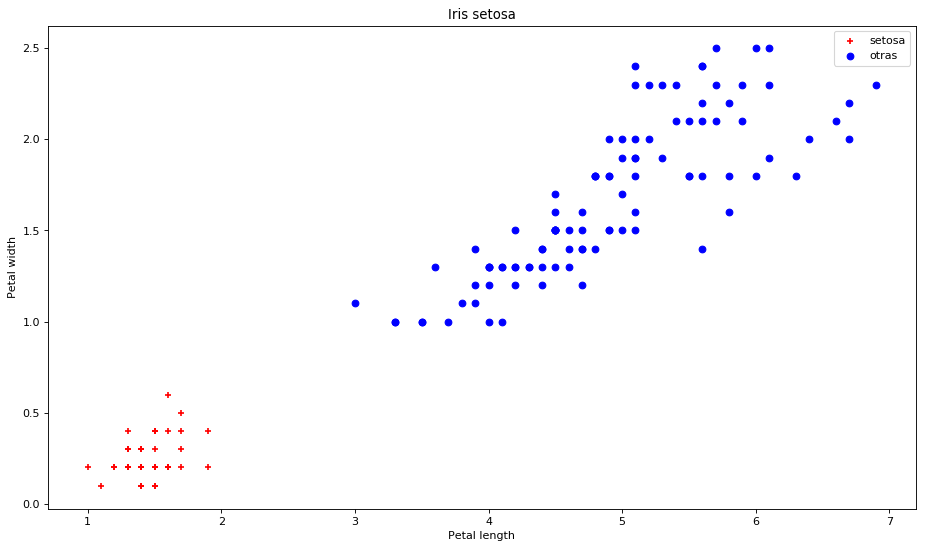

In [13]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'r', marker = '+', label="setosa")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'b', marker = 'o', label="otras")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.title("Iris setosa");

# Modelo de clasificación lineal en scikit-learn

### Modelo con un *Pipeline* con escalado
Se realiza el ejemplo del libro en el cual se aplica un *pipeline* con escalado estándar de *features* y un clasificador lineal con $C=1$ y función de pérdida de *hinge* (bisagra) $\max \left\{ 0, 1-t\right\}$.

In [14]:
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))
svm_clf

Pipeline(memory=None,
     steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [15]:
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [16]:
svm_clf.predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
# Computar la tasa de accuracy
np.mean(np.equal(svm_clf.predict(X), y))*100

100.0

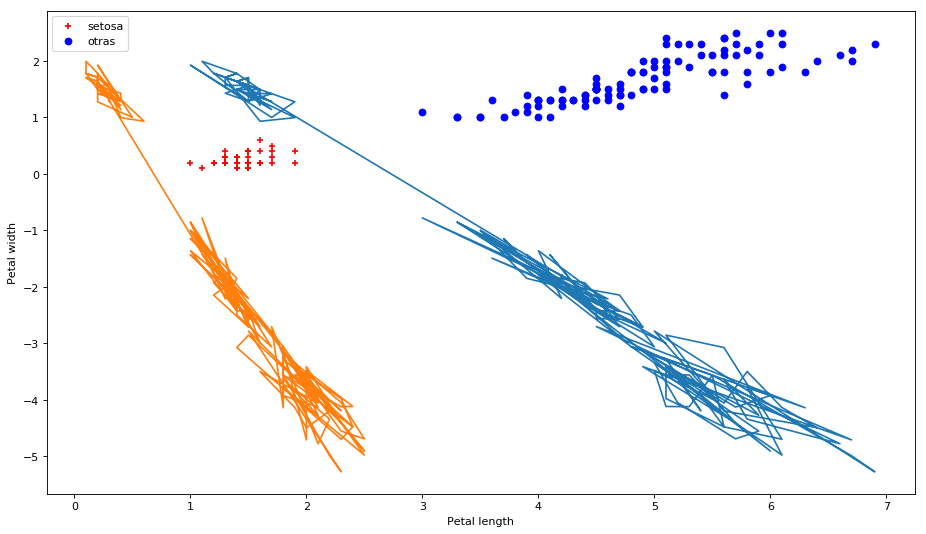

In [18]:
# Graficando la curva de decisión
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'r', marker = '+', label="setosa")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'b', marker = 'o', label="otras")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
Ybound = svm_clf.decision_function(X)
plt.plot(X, Ybound);

In [19]:
# Generando la clasificación de un elemento de X
svm_clf.predict([X[0]])

array([1.])

### Entrenamiento con datos crudos

Ahora se realizará una prueba con datos crudos (sin el *pipeline*)

In [20]:
svmt = LinearSVC(C=1, loss="hinge")
svmt.fit(X, y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [21]:
# Revisando los coeficientes
svmt.coef_, svmt.intercept_

(array([[-0.72280702, -1.03508772]]), array([2.56491228]))

In [22]:
svmt.coef_.shape, svmt.intercept_.shape

((1, 2), (1,))

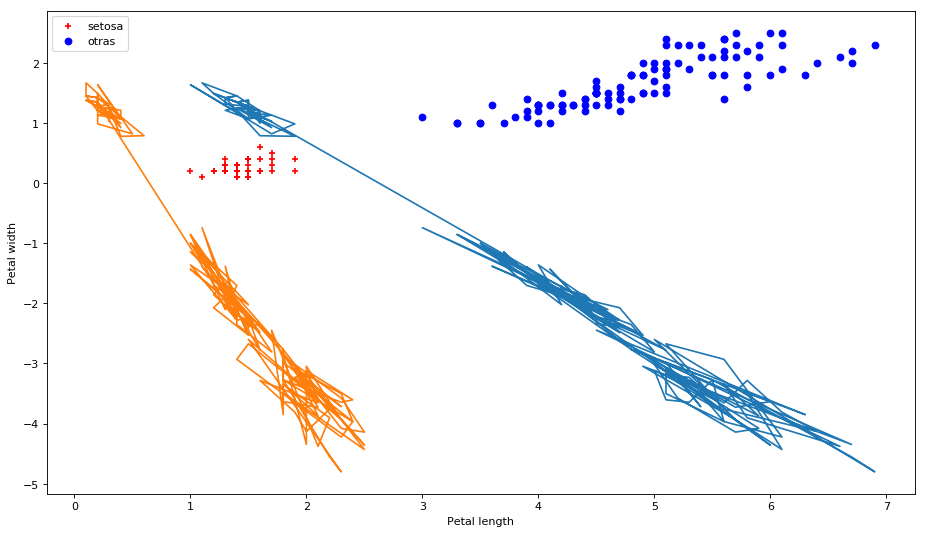

In [23]:
# Graficando los límites de decisión
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'r', marker = '+', label="setosa")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'b', marker = 'o', label="otras")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
Ybound = svmt.decision_function(X)
plt.plot(X, Ybound);

***
# Construcción del modelo en TensorFlow

En esta sección construiremos el modelo a través de un grafo en TensorFlow. Para esto, construiremos la función de hipótesis, la función de costo y el optimizador (a través de gradiente en descenso de TensorFlow). Finalmente, inicializaremos los parámetros entrenables del modelo. En este caso, se utilizará una función para poder cambiar el grafo de acuerdo al número de parámetros a estimar.

#### Función de costo a minimizar
La función de costo a optimizar será: $$ J(\mathbb{w}, b) = \frac{1}{2}\mathbb{w}^{T}\mathbb{w} + C\,\sum_{i = 1}^{m} \max\left\lbrace 0, 1 - t^{(i)}\left( \mathbb{w}^{T} x^{(i)} + b \right)\right\rbrace $$ donde 
$$ t^{(i)} =   \left\{
\begin{array}{ll}
      1, & \mathrm{si}\quad y^{(i)} = 1 \\
      -1,  & \mathrm{si}\quad y^{(i)} = 0
\end{array} 
\right.  $$ e $i = 1, 2, \ldots, m$ indexa los ejemplos.

#### Función de hipótesis
La función de clasificación para la SVM es simplemente: 
$$ \hat{y}^{(i)} =   \left\{
\begin{array}{ll}
      1, & \mathrm{si}\quad \mathbb{w}^{T} x^{(i)} + b \geq 0 \\
      0,  & \mathrm{si}\quad \mathbb{w}^{T} x^{(i)} + b < 0
\end{array} 
\right.  $$

In [24]:
X.shape, y.shape

((150, 2), (150,))

In [29]:
def entrenarSVM(Xtrain, Ytrain, lr, C, epochs, tag):
    import time
    
    # Obtener features de xtrain y número de  ejemplos
    m, k = Xtrain.shape
    
    # Obtener la variable t para el algoritmo
    tTrain = np.array([1.0 if z == 1 else -1.0 for z in Ytrain])

    # Crear el grafo
    # -------------------------------------------------------------------------
    tf.reset_default_graph()
    g = tf.Graph()
    with g.as_default():
        # Creando los placeholders
        X = tf.placeholder(tf.float32, shape = (m, k), name = "X")
        y = tf.placeholder(tf.float32, shape = (m, 1), name = "y")
        t = tf.placeholder(tf.float32, shape = (m, 1), name = "t")

        # Hiperparámetros del modelo
        lr_param = tf.placeholder(tf.float32, name = "lr")
        C_param = tf.placeholder(tf.float32, name = "C")
        
        # Coeficientes de regresión de logits, incluyendo intercepto
        W = tf.Variable(tf.truncated_normal(shape = (k, 1), seed = 123), name = "W")
        b = tf.Variable(tf.truncated_normal(shape = (1, 1), seed = 123), name = "b")
        
        #W = tf.Variable(tf.constant(4., shape = [k, 1]), name = "W")
        #b = tf.Variable(tf.constant(-10., shape = [1, 1]), name = "b")
        
        # Salida del modelo
        with tf.name_scope("SVM_model"):
            svm_op = tf.add(tf.matmul(X, W), b, name = "svm_op")
            t_hat = tf.sign(svm_op, name = "t_hat")

        # Función de costo
        with tf.name_scope("FuncionCosto"):
            # Norma de los pesos
            w_norm = tf.multiply(tf.constant(0.5), tf.reduce_sum(tf.square(W)), name = "w_norm")
            # Suma de la función de pérdida "hinge"
            classif_term = tf.reduce_sum(tf.maximum(tf.constant(0.), tf.subtract(tf.constant(1.), tf.multiply(t, svm_op))), name = "classif_term")
            #classif_term = tf.losses.hinge_loss(labels = y, logits = svm_op)
            # Función de costo total
            cost = tf.add(w_norm, tf.multiply(C_param, classif_term), name = "Costo")

        # Accuracy del modelo
        with tf.name_scope("Accuracy"):
            accuracy = tf.reduce_mean(tf.cast(tf.equal(t_hat, t), tf.float32), name = "accuracy")
        
        # Gradient Descent Optimizer 
        with tf.name_scope("GradientDes.Optimizer"):
            trainstep = tf.train.GradientDescentOptimizer(lr_param).minimize(cost) 

        with tf.name_scope("Summaries"):
            # Summary de costo para el TensorBoard
            costSummary = tf.summary.scalar(name='fCosto', tensor = cost)
            # Summary de precisión para el TensorBoard
            accuracySummary = tf.summary.scalar(name='accuracySummary', tensor = accuracy)
            # Agrupar los sumaries
            summaries = tf.summary.merge_all()
            
        # Global Variables Initializer 
        init = tf.global_variables_initializer() 
        
    # Entrenamiento del modelo
    # -------------------------------------------------------------------------

    start = time.time()
    with tf.Session(graph = g) as sess:
        
        # Crear el objeto writer
        writer = tf.summary.FileWriter('./board/lr=%0.6f, C=%0.6f, epochs=%d, <%s>' % (lr, C, epochs, tag), sess.graph)
        
        # Inicializar variables
        sess.run(init)
        
        for epoch in range(epochs):
            # Ejecutar batch gradient descent
            _, c_, acc_, summ_ = sess.run([trainstep, cost, accuracy, summaries], 
                                  feed_dict = {X : Xtrain, y : Ytrain.reshape((m, 1)), t : tTrain.reshape((m, 1)), lr_param : lr, C_param : C})
            
            # Agregar summaries al tablero
            writer.add_summary(summ_, epoch + 1)
            
            if (epoch + 1) % round(epochs*0.1) == 0:
                print("Epoch: %d, \t accuracy = %0.2f, \t costo = %0.4f" % (epoch+1, acc_, c_))
                
        # Cerrar el writer del summary
        writer.close()
                
        # Obtener los parámetros finales para devolverlos
        w_, b_ = sess.run([W, b])
        
    end = time.time()
    print("Tiempo transcurrido: %0.2f segundos" % (end-start))
    
    # Devolver los parámetros
    return w_, b_
        

In [30]:
# Función para graficar los puntos X,y , junto con la línea de decisión
# obtenida a través de los parámetros w, b
def grafSVM(X, y, w, b): 
    #fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'r', marker = '+', label="setosa")
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'b', marker = 'o', label="otras")
    plt.legend()
    plt.title("Iris setosa")
    
    # Graficar línea de decisión
    grillaX = np.array([d[0] for d in X])
    m_ = -w[0,0] / w[1,0]
    b_ = -b[0] / w[1,0]
    yDesBound = b_ + m_*grillaX
    plt.plot(grillaX, yDesBound, 'k-', label = "Límite de decisión")
    

Epoch: 100, 	 accuracy = 1.00, 	 costo = 3.2210
Epoch: 200, 	 accuracy = 1.00, 	 costo = 1.8482
Epoch: 300, 	 accuracy = 1.00, 	 costo = 1.5305
Epoch: 400, 	 accuracy = 1.00, 	 costo = 1.4412
Epoch: 500, 	 accuracy = 1.00, 	 costo = 1.3904
Epoch: 600, 	 accuracy = 1.00, 	 costo = 1.3518
Epoch: 700, 	 accuracy = 1.00, 	 costo = 1.4144
Epoch: 800, 	 accuracy = 1.00, 	 costo = 1.3146
Epoch: 900, 	 accuracy = 1.00, 	 costo = 1.2976
Epoch: 1000, 	 accuracy = 1.00, 	 costo = 1.2809
Tiempo transcurrido: 1.21 segundos


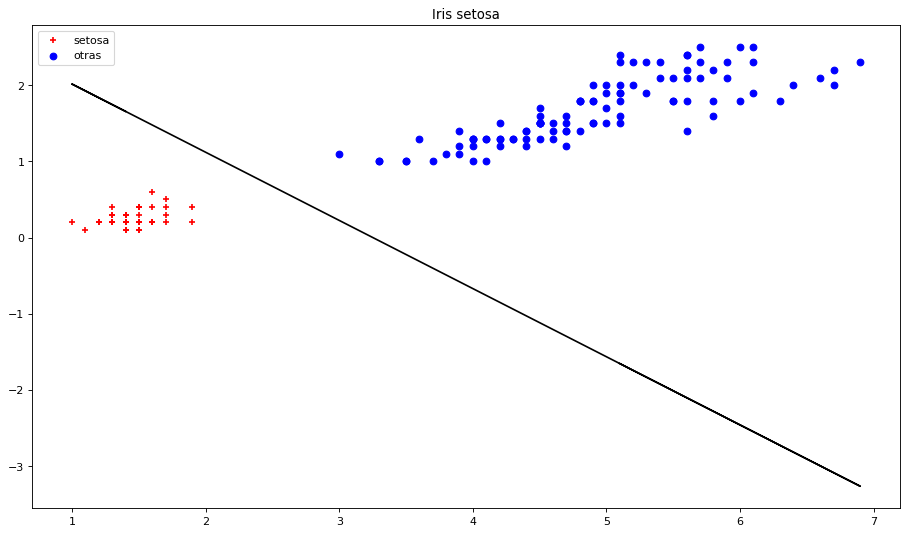

In [37]:
# Entrenar SVM
w, b = entrenarSVM(X, y, lr = 0.001, C = 5., epochs = 1000, tag = 'linearSVM')
# Gráfica
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
grafSVM(X, y, w, b)
#plt.axes().set_aspect("equal")

In [32]:
w, b

(array([[-1.0681789],
        [-1.224524 ]], dtype=float32), array([[3.5232983]], dtype=float32))

In [34]:
# Accuracy
np.mean(np.equal(yhat, y))

1.0

## Curvas de costo y *accuracy*

<img src="images/curvas-iris.png" title="Curvas de costo y accuracy">

***
# Entrenamiento con datos simulados

Quisimos probar con otro modelo con datos simulados:

In [38]:
n = 200
# pos
X1 = np.random.uniform(low = 3., high = 5., size = (n, 2))
Y1 = np.ones(n)
# neg
X2 = np.random.uniform(low = 0, high = 2, size = (n, 2))
Y2 = np.zeros(n)
# Comb

In [39]:
XsimData = np.append(X1, X2, 0)
YsimData = np.append(Y1, Y2, 0)

XsimData.shape, YsimData.shape

((400, 2), (400,))

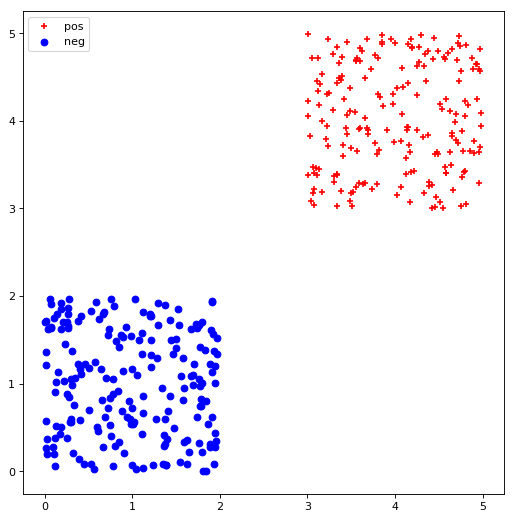

In [41]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(XsimData[YsimData == 1, 0], XsimData[YsimData == 1, 1], c = 'r', marker = '+', label="pos")
plt.scatter(XsimData[YsimData == 0, 0], XsimData[YsimData == 0, 1], c = 'b', marker = 'o', label="neg")
plt.legend();
plt.axes().set_aspect("equal")

Epoch: 100, 	 accuracy = 0.83, 	 costo = 16.2002
Epoch: 200, 	 accuracy = 1.00, 	 costo = 3.7582
Epoch: 300, 	 accuracy = 1.00, 	 costo = 1.9022
Epoch: 400, 	 accuracy = 1.00, 	 costo = 1.3804
Epoch: 500, 	 accuracy = 1.00, 	 costo = 1.1117
Epoch: 600, 	 accuracy = 1.00, 	 costo = 0.9382
Epoch: 700, 	 accuracy = 1.00, 	 costo = 0.8353
Epoch: 800, 	 accuracy = 1.00, 	 costo = 0.7755
Epoch: 900, 	 accuracy = 1.00, 	 costo = 0.7275
Epoch: 1000, 	 accuracy = 1.00, 	 costo = 0.6946
Tiempo transcurrido: 1.28 segundos


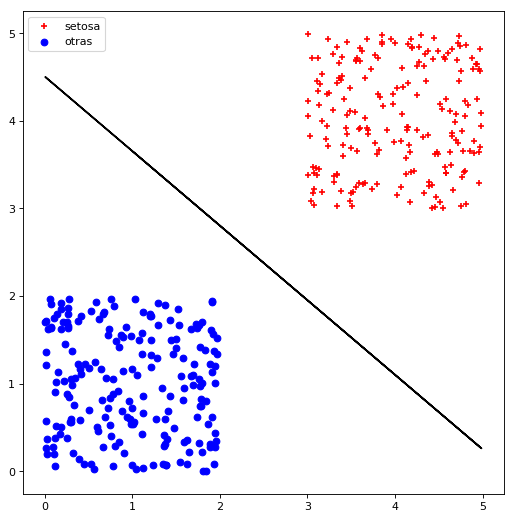

In [42]:
w, b = entrenarSVM(XsimData, YsimData, lr = 0.001, C = 0.1, epochs = 1000, tag = "datosSimulados")

# Generar la gráfica
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
grafSVM(XsimData, YsimData, w, b)
plt.title("")
plt.axes().set_aspect('equal')

## Curvas de costo y *accuracy*

<img src="images/curvas-sim.png" title="Curvas de costo y accuracy">

***
# Clasificación no lineal con SVM


In [57]:
# Datos de simulación
X1 = np.arange(-4, 5)
Y = 1.0 * ((X1 > -3) & (X1 < 3))
X1, Y

(array([-4, -3, -2, -1,  0,  1,  2,  3,  4]),
 array([0., 0., 1., 1., 1., 1., 1., 0., 0.]))

In [73]:
X1 ** 2

array([16,  9,  4,  1,  0,  1,  4,  9, 16])

In [82]:
# Agregamos una feature polinomial para que el conjunto sea separable
X2 = np.hstack((np.expand_dims(X1, axis=1), (X1 ** 2).reshape((X1.shape[0], 1))))
X2

array([[-4, 16],
       [-3,  9],
       [-2,  4],
       [-1,  1],
       [ 0,  0],
       [ 1,  1],
       [ 2,  4],
       [ 3,  9],
       [ 4, 16]])

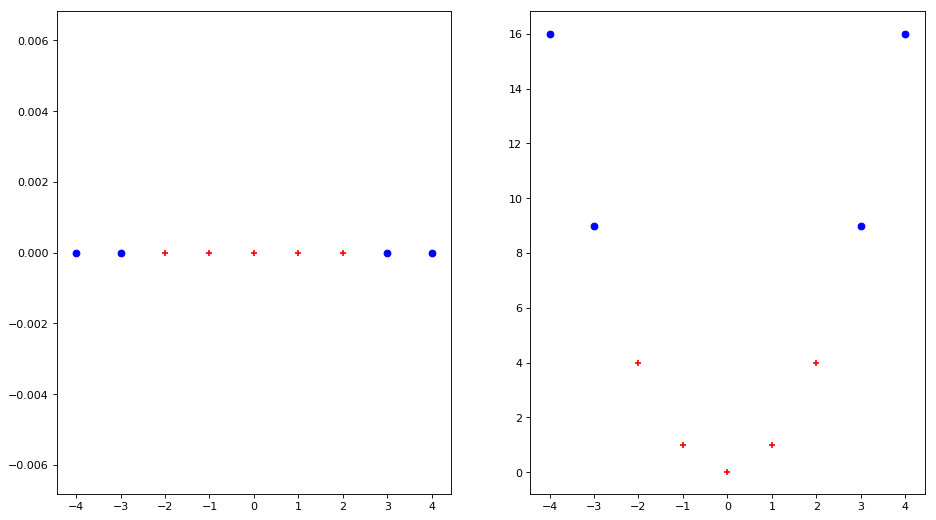

In [95]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.scatter(X1[Y == 1], np.zeros_like(X1[Y == 1]), c = 'r', marker = '+', label="pos")
plt.scatter(X1[Y == 0], np.zeros_like(X1[Y == 0]), c = 'b', marker = 'o', label="neg")
plt.subplot(1,2,2)
plt.scatter(X2[Y == 1, 0], X2[Y == 1, 1], c = 'r', marker = '+', label="pos")
plt.scatter(X2[Y == 0, 0], X2[Y == 0, 1], c = 'b', marker = 'o', label="neg");

Con el segundo conjunto de datos sí es posible separarlos linealmente. Notar que se tuvo que agregar la *feature* $x^2$

In [88]:
w, b = entrenarSVM(X2, Y, lr = 0.01, C = 1., epochs = 1000, tag = 'NonLinearSVM')

Epoch: 100, 	 accuracy = 1.00, 	 costo = 1.3641
Epoch: 200, 	 accuracy = 1.00, 	 costo = 0.1634
Epoch: 300, 	 accuracy = 1.00, 	 costo = 0.1462
Epoch: 400, 	 accuracy = 1.00, 	 costo = 0.1224
Epoch: 500, 	 accuracy = 1.00, 	 costo = 0.1193
Epoch: 600, 	 accuracy = 1.00, 	 costo = 0.1162
Epoch: 700, 	 accuracy = 1.00, 	 costo = 0.1127
Epoch: 800, 	 accuracy = 1.00, 	 costo = 0.1309
Epoch: 900, 	 accuracy = 1.00, 	 costo = 0.1255
Epoch: 1000, 	 accuracy = 1.00, 	 costo = 0.1473
Tiempo transcurrido: 1.24 segundos


In [90]:
w, b

(array([[ 0.00194994],
        [-0.5372706 ]], dtype=float32), array([[3.2432957]], dtype=float32))

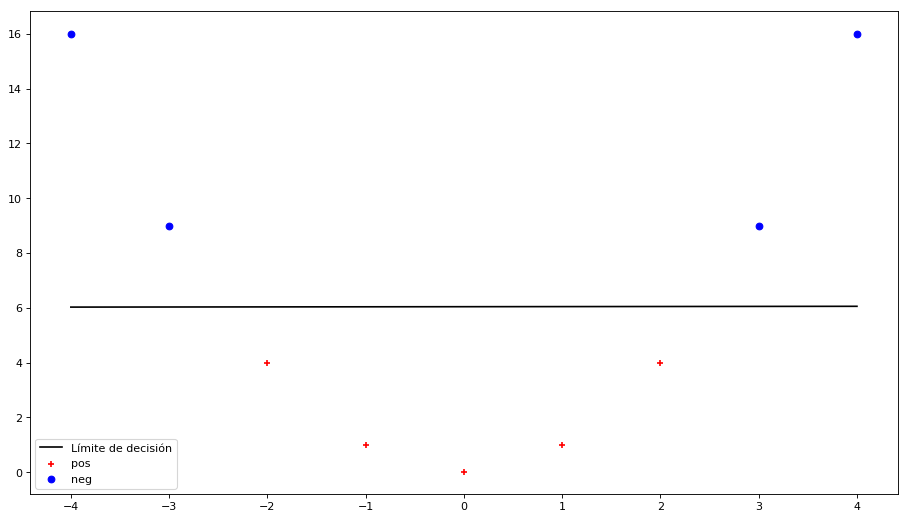

In [96]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
grafSVM(X2, Y, w, b)
plt.title("");
plt.legend(['Límite de decisión', 'pos', 'neg']);

*** 
# RBF Kernel

Ahora utilizaremos una función de similitud para aplicar una clasificación de SVM no lineal. Ejemplo de la ecuación 5.1, página 151.

In [99]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.power(x - landmark, 2))

In [116]:
# Nuevas features con landmarks en x = -2 y x = 1
gamma_ = 0.3
f1 = gaussian_rbf(X1, -2, gamma_)
f2 = gaussian_rbf(X1, 1, gamma_)
# Matriz de features
F = np.vstack((f1, f2)).T

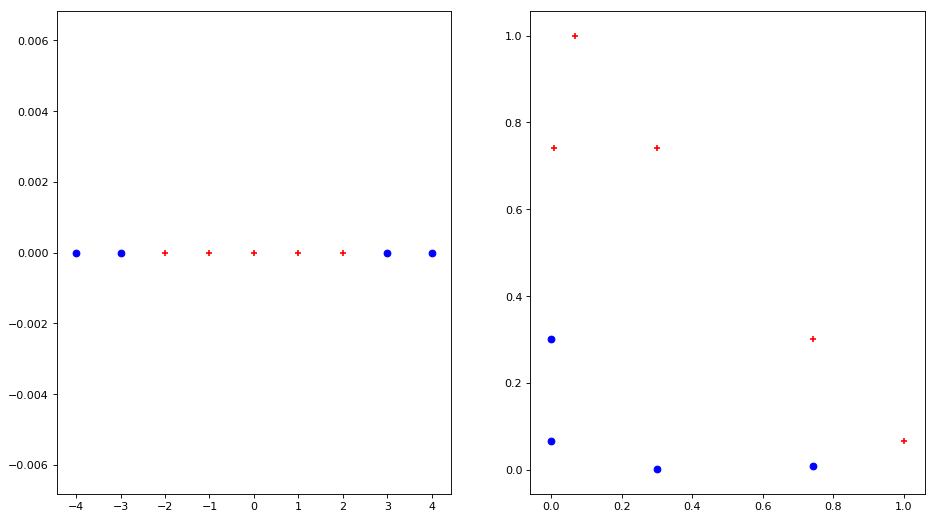

In [118]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.scatter(X1[Y == 1], np.zeros_like(X1[Y == 1]), c = 'r', marker = '+', label="pos")
plt.scatter(X1[Y == 0], np.zeros_like(X1[Y == 0]), c = 'b', marker = 'o', label="neg")
plt.subplot(1,2,2)
plt.scatter(F[Y == 1, 0], F[Y == 1, 1], c = 'r', marker = '+', label="pos")
plt.scatter(F[Y == 0, 0], F[Y == 0, 1], c = 'b', marker = 'o', label="neg");

Como se observa, al utilizar como *landmarks* o puntos de referencia los puntos $x = -2$ y $x = 1$, también se vuelve linealmente separable el conjunto.

In [135]:
w, b = entrenarSVM(F, Y, lr = 0.01, C = 25., epochs = 2000, tag = 'GaussianRBFSimilarity')
w, b

Epoch: 200, 	 accuracy = 1.00, 	 costo = 40.5245
Epoch: 400, 	 accuracy = 1.00, 	 costo = 40.8856
Epoch: 600, 	 accuracy = 1.00, 	 costo = 40.5340
Epoch: 800, 	 accuracy = 1.00, 	 costo = 41.0881
Epoch: 1000, 	 accuracy = 1.00, 	 costo = 41.4888
Epoch: 1200, 	 accuracy = 0.89, 	 costo = 54.6561
Epoch: 1400, 	 accuracy = 1.00, 	 costo = 40.9034
Epoch: 1600, 	 accuracy = 1.00, 	 costo = 40.2976
Epoch: 1800, 	 accuracy = 1.00, 	 costo = 41.0221
Epoch: 2000, 	 accuracy = 1.00, 	 costo = 40.8206
Tiempo transcurrido: 2.56 segundos


(array([[3.1044018],
        [5.201931 ]], dtype=float32), array([[-2.846702]], dtype=float32))

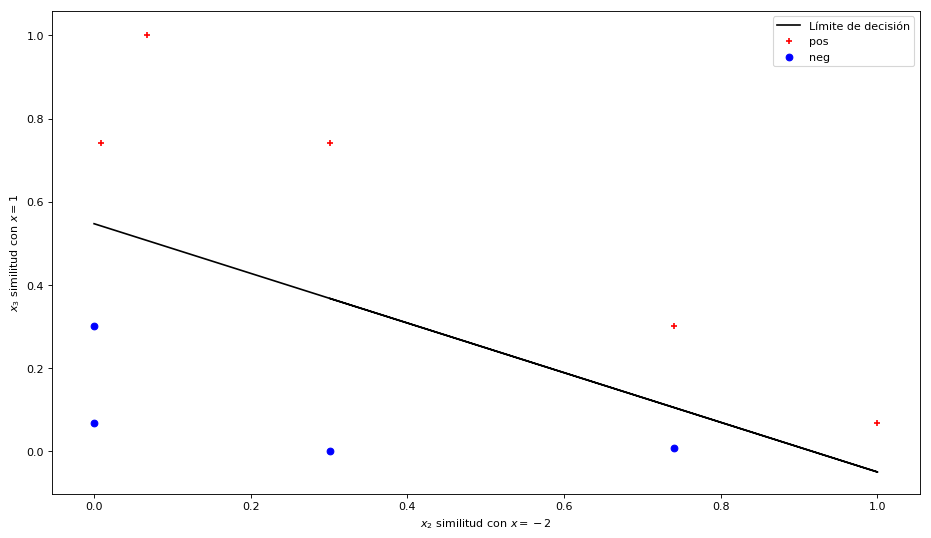

In [141]:
fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
grafSVM(F, Y, w, b)
plt.title("");
plt.legend(['Límite de decisión', 'pos', 'neg']);
plt.xlabel("$x_2$ similitud con $x=-2$");
plt.ylabel("$x_3$ similitud con $x=1$");

## Curvas de costo y *accuracy*

<img src="images/curvas-gaussian-rbf.png" title="Curvas de costo y accuracy">

In [137]:
X1

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [139]:
gaussian_rbf(X1, landmark=X1, gamma=0.3)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])